# Net Load Visualization

This notebook demonstrates how to use create a unique net load visualization using data from the Grid Status API and Plotly

For more information about the API, please visit: https://www.gridstatus.io/api

## Installation

To run this notebook, install the gridstatusio package with notebook dependencies:

```bash
uv pip install gridstatusio[notebooks]
```

In [1]:
import plotly.graph_objects as go

import gridstatusio

gridstatusio.__version__

'0.13.0'

## Setting up the API client

First, we need to set up the GridStatusClient by providing our API key. You can either set the API key using the GRIDSTATUS_API_KEY environment variable or pass it to the constructor directly.

In [4]:
# gridstatusio.GridStatusClient(api_key="YOUR_API_KEY_HERE")
client = gridstatusio.GridStatusClient()

## Query Data

Select the ISO and date range to get data for. Specify `timezone` to set the time zone of timestamp in the returned data. Make sure to set `limit` to avoid quickly using your monthly API row allotment

In [5]:
QUERY_LIMIT = 10_000

In [6]:
# Pick an ISO and time range to visualize (ercot, caiso, pjm, miso, isone, nyiso, spp, weis, ieso)
ISO = "ercot"
START = "Jul 1, 2023"
END = "Aug 1, 2023"

df = client.get_dataset(
    dataset=f"{ISO}_standardized_hourly",
    start=START,
    end=END,
    timezone="market",
    limit=QUERY_LIMIT,
)

df

2025-07-28 09:16:41 - INFO - Fetching Page 1...
2025-07-28 09:16:41 - INFO - GET https://api.gridstatus.io/v1/datasets/ercot_standardized_hourly/query
2025-07-28 09:16:41 - INFO - Params: {'start_time': Timestamp('2023-07-01 00:00:00'), 'end_time': Timestamp('2023-08-01 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': None, 'resample_by': None, 'resample_function': None, 'publish_time': None, 'timezone': 'market', 'cursor': '', 'filter_column': None, 'filter_value': None, 'filter_operator': '=', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2025-07-28 09:16:42 - INFO - Done in 0.47 seconds. 
2025-07-28 09:16:42 - INFO - Total rows: 744/10,000 (7.44% of limit)
2025-07-28 09:16:42 - INFO - Total number of rows: 744


,interval_start_local,interval_start_utc,interval_end_local,interval_end_utc,load_forecast.load_forecast,net_load,renewables,renewables_to_load_ratio,load.load,fuel_mix.coal_and_lignite,fuel_mix.hydro,fuel_mix.nuclear,fuel_mix.power_storage,fuel_mix.solar,fuel_mix.wind,fuel_mix.natural_gas,fuel_mix.other
0,2023-07-01 00:00:00-05:00,2023-07-01 05:00:00+00:00,2023-07-01 01:00:00-05:00,2023-07-01 06:00:00+00:00,57706.735662,42435.583333,14946.241667,0.260516,57371.583333,9991.041667,10.241667,4647.825000,52.058333,0.075000,14935.925000,28033.925000,50.583333
1,2023-07-01 01:00:00-05:00,2023-07-01 06:00:00+00:00,2023-07-01 02:00:00-05:00,2023-07-01 07:00:00+00:00,54772.316920,39245.383333,15184.233333,0.279025,54418.916667,8444.666667,10.700000,4648.125000,90.783333,0.133333,15173.400000,26298.516667,50.766667
2,2023-07-01 02:00:00-05:00,2023-07-01 07:00:00+00:00,2023-07-01 03:00:00-05:00,2023-07-01 08:00:00+00:00,52407.785614,39752.491667,12695.816667,0.242202,52418.250000,8848.083333,30.058333,4648.133333,39.900000,0.175000,12665.583333,26516.108333,50.491667
3,2023-07-01 03:00:00-05:00,2023-07-01 08:00:00+00:00,2023-07-01 04:00:00-05:00,2023-07-01 09:00:00+00:00,50895.350212,39481.475000,11229.908333,0.221497,50700.000000,8844.108333,11.383333,4648.175000,5.600000,0.091667,11218.433333,26312.975000,50.316667
4,2023-07-01 04:00:00-05:00,2023-07-01 09:00:00+00:00,2023-07-01 05:00:00-05:00,2023-07-01 10:00:00+00:00,49704.252546,38177.883333,11296.808333,0.228381,49464.666667,7679.100000,10.025000,4649.508333,0.550000,0.100000,11286.683333,25974.008333,50.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2023-07-31 19:00:00-05:00,2023-08-01 00:00:00+00:00,2023-07-31 20:00:00-05:00,2023-08-01 01:00:00+00:00,79744.256101,66683.483333,13167.908333,0.165254,79682.666667,11549.125000,168.725000,4925.475000,759.966667,3143.333333,9855.850000,48654.116667,102.891667
740,2023-07-31 20:00:00-05:00,2023-08-01 01:00:00+00:00,2023-07-31 21:00:00-05:00,2023-08-01 02:00:00+00:00,77097.123479,66611.416667,10539.808333,0.136914,76981.250000,11686.591667,169.975000,4927.766667,590.533333,218.091667,10151.741667,48463.316667,104.983333
741,2023-07-31 21:00:00-05:00,2023-08-01 02:00:00+00:00,2023-07-31 22:00:00-05:00,2023-08-01 03:00:00+00:00,74676.180786,63102.458333,12050.841667,0.160403,75128.333333,11712.975000,24.966667,4930.858333,197.508333,12.283333,12013.591667,45654.300000,103.725000
742,2023-07-31 22:00:00-05:00,2023-08-01 03:00:00+00:00,2023-07-31 23:00:00-05:00,2023-08-01 04:00:00+00:00,71646.709106,56603.116667,14711.100000,0.206298,71309.833333,11491.566667,4.383333,4937.408333,161.433333,10.300000,14696.416667,40021.083333,88.175000


## Make Graph

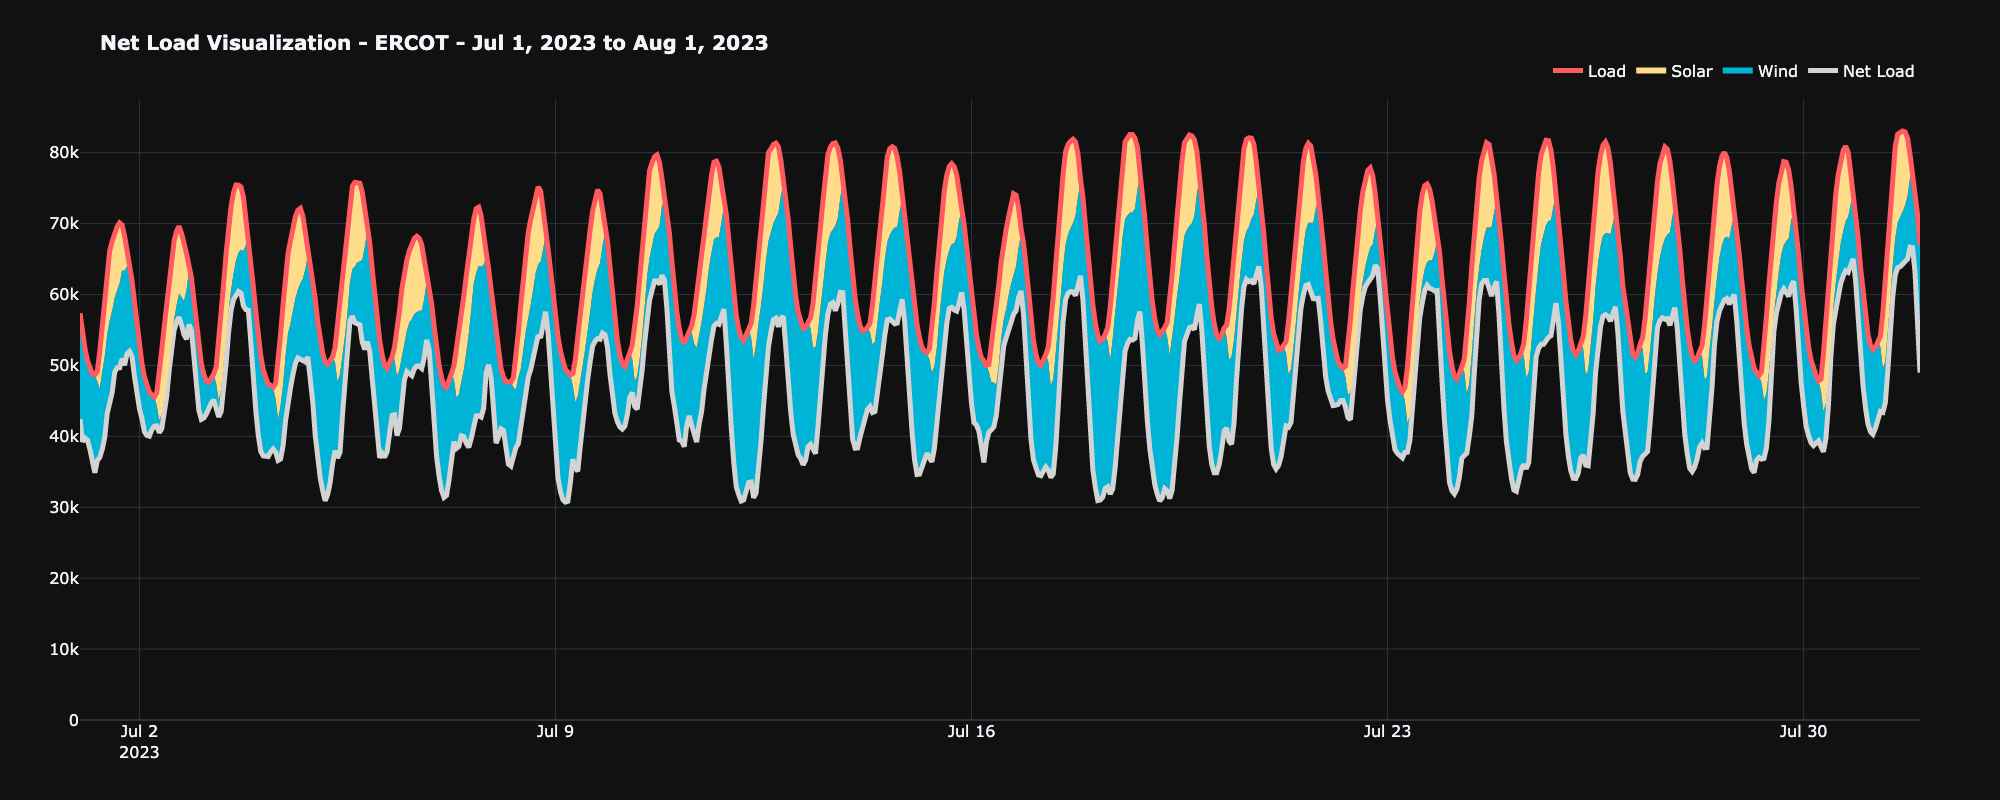

In [ ]:
fig = go.Figure()

# Define colors
yellow = "#ffdc89"
light_blue = "#00b4d8"
purple = "#9b59b6"
gray = "#D3D3D3"
red = "#ff5a5f"


# Add traces
fig.add_trace(
    go.Scatter(
        x=df["interval_start_local"],
        y=df["net_load"],
        name="Net Load",
        stackgroup="one",
        fill="none",
        line=dict(color=gray, width=5),
    )
)

fig.add_trace(
    go.Scatter(
        x=df["interval_start_local"],
        y=df["fuel_mix.wind"],
        name="Wind",
        fill="tonexty",
        stackgroup="one",
        mode="none",
        fillcolor=light_blue,
    )
)

fig.add_trace(
    go.Scatter(
        x=df["interval_start_local"],
        y=df["fuel_mix.solar"],
        name="Solar",
        fill="tonexty",
        stackgroup="one",
        mode="none",
        fillcolor=yellow,
    )
)

fig.add_trace(
    go.Scatter(
        x=df["interval_start_local"],
        y=df["load.load"],
        name="Load",
        mode="lines",
        line=dict(color=red, width=5),
    )
)

# Horizontal legend
fig.update_layout(
    template="plotly_dark",
    title=f"<b>Net Load Visualization - {ISO.upper()} - {START} to {END} </b>",
    # bold title
    title_font=dict(size=20),
    font=dict(size=16),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
    ),
)

fig.show("png", width=2000, height=800)